# **Ejercicios de Programación** 

##### Daniel López 
##### Computación 8093 

---
---

## *Ejercicio 1*  
#### a) Promedio de dos números

---

Para tomar el promedio de $a$ y $b$ simplemente usamos la definición $\frac{a+b}{2}$:

In [1]:
a = float(input('> '))
b = float(input('> '))

print((a + b) / 2)

>  85
>  95


90.0


Convertimos el input a números e imprimimos el promedio.

#### b) Calcular $\sum_{i=0}^{n} i$

---

Una forma sencilla de hacer el cálculo es apoyándonos en la fórmula de Gauss, la cual afirma que 
$$
\sum_{i=0}^{n} i = \frac{n(n+1)}{2}.
$$

In [2]:
lim = int(input('> '))

if lim >= 0:
    print(lim * (lim + 1) // 2)

>  100


5050


El `if` asegura que el límite de la sumatoria tenga sentido dentro de este contexto, pues el límite superior de una sumatoria debe ser mayor o igual al inferior. Además, para evitar redondeos indeseados podemos utilizar la división de enteros, `//`, que tiene precisión arbitraria.

#### c) Calcular el factorial de un número introducido por el usuario

---

Recornemos que para $n \in \mathbb{N}$, el factorial de $n$ se define como $1 \cdot 2 \cdot 3 \cdot \ldots \cdot n  = \prod_{i = 1}^{n} i $. ($0! = 1$ por convención). 

Usando una estructura `while`, podemos multiplicar enteros positivos sucesivos. Empezamos declarando una variable contadora, y la variable `fac`, que almacena el valor del factorial. Ambas comienzan en $1$. Luego simplemente multiplicamos `fac` por valores sucesivos de $n$. El proceso se detiene cuando la variable contadora alcanza el valor del número introducido por el usuario.

In [3]:
num = int(input('Factorial: '))
n = 1                                       # Variable contadora.
fac = 1

if num >= 0:                                # El factorial no está definido para números negativos.
    while n < num:
        fac = fac * (n + 1)                 
        n = n + 1                           

    print (f"{num}! = {fac}")               # Notemos que esto devuelve 0! = 1.

Factorial:  6


6! = 720


Además de lo anteriormente dicho, se añade un condicional para asegurar que el número introducido por el usuario tenga un factorial definido.

#### d) Calcular la potencia $a^n$

---

Una solución simple es usando un `while` con una variable contadora, pues recordemos que la enésima potencia de $a$ (si $n$ es un entero positivo) se define como: 
$$
a^n = \underbrace{a \cdot a \cdot \ldots \cdot a}_{n \ \text{veces}}.
$$

Como este concepto es fácil de extender a potencias negativas $\left(a^{-n} = \frac{1}{a^n}\right)$, así que también se incluye en el código.

In [4]:
base = int(input('Base: '  ))           # Convertimos el input en números.
exp = int(input('Exponente: ' ))
n = 1                                   # Variable contadora.
pow = 1                                 # Almacena la potencia.

while n <= abs(exp):                    # Si el exponente es cero, el ciclo no inicia.
    pow = pow * base                    
    n = n + 1                           

if exp >= 0:
    print(f"Resultado: {pow}") 
elif exp < 0:
    print(f"Resultado: {1 / float(pow)}")

Base:  2
Exponente:  8


Resultado: 256


Empezamos declarando las variables necesarias. En este  caso`pow` almacena la potencia, y empieza con el valor $1$, esto para asegurar que $a^0 = 1$ (incluso cuando $a = 0$). El ciclo `while` es básicamente la traducción a código de lo que se dijo antes. Multiplica la base por sí misma hasta que la variable contadora sea mayor al **valor absoluto** del exponente. Así, al final del ciclo, `pow` tiene el valor $a^{|n|}$. <br>

Si la potencia era positiva se imprime `pow` tal cual; si era negativa se imprime su recíproco.

## *Ejercicio 2* 

---
---

**Calcular $\mathrm{C}_{n}^{k} = \begin{pmatrix}
n \\
k
\end{pmatrix}
$.**

Basta con aplicar la siguiente fórmula:

\begin{align*}
\begin{pmatrix}
n \\
k
\end{pmatrix} 
= \frac{n!}{k!(n-k)!}
\end{align*}

Recordando que $k$ debe cumplir con $0 \leq k \leq n$. También nos apoyamos en la función factorial que definimos antes.

In [12]:
def fac(num):
    fac = 1
    n = 1
    if num >= 0:
        while n < num:
            fac = fac * (n + 1)
            n = n + 1
        return fac

n = int(input("Combinación de: "))
k = int(input("en: "))

if k <= n:
    print(fac(n) // (fac(k) * fac(n - k)))

Combinación de:  12
en:  2


66


Por la fórmula de arriba, sabemos que el resultado es un entero, así que usamos `//`. Además, agregamos la condición $k \leq n$, de lo contrario la combinatoria está indefinida.

## *Ejercicio 3*

---
---

**Aproximación de $\pi$ siguiendo la serie**

$$
\sum_{n = 0}^{\infty} \frac{(-1)^n}{2n + 1} = \frac{\pi}{4}.
$$

Para ello, simplemente pedimos al usuario un valor del límite superior, que nos diga cuántos términos de la serie sumar; mientras más grande el número, mejor la aproximación. Luego de sumar iteradamente los términos simplemente multiplicamos el resultado por $4$.

In [14]:
lim = int(input('Ingrese el número de términos que desea sumar: '))
n = 0                                                      
pi = 0                                                     

if lim >= 0:                                                
    while n <= lim:                                         
        pi = pi + ((-1) ** n / (float(2 * n + 1)))          
        n = n + 1

    print(4 * pi)    

Ingrese el número de términos que desea sumar:  10000000


3.1415927535897814


El valor de cada suma se almacena en `pi`, al cual se le suma el siguiente término de la serie hasta alcanzar el límite superior dado por el usuario. Al final simplemente multiplicamos este resultado por $4$ para aproximar $\pi$. 

Notemos también que la serie converge muy lento, pues necesitamos sumar diez millones de términos para obtener una aproximación con seis decimales de precisión.

## *Ejercicio 4*

---
---

**Calcular $e$ basándose en la serie:**

$$
\sum_{n = 0}^{\infty} \frac{1}{n!} = e .
$$

Este problema es muy parecido al anterior, así que la solución tendrá exactamente la misma estructura: pedir un límite superior al usuario y calcular la serie con una estructura `while`. La única diferencia es que esta serie converge directamente al valor que queremos aproximar, así que podemos imprimir el resultado a la pantalla sin hacer ninguna otra manipulación aritmética.

In [15]:
def fac(num):                                       # Función factorial.
    fac = 1
    n = 1
    if num >= 0:
        while n < num:
            fac = fac * (n + 1)
            n = n + 1
        return fac

lim = int(input('Ingrese el número de términos que desea sumar: '))
n = 0                                          
eul = 0                                        

if lim >= 0:                                    
    while n <= lim:                            
        eul = eul + 1 / float(fac(n))          
        n = n + 1

    print(eul)    

Ingrese el número de términos que desea sumar:  150


2.7182818284590455


Nos apoyamos de la función factorial que definimos en el ejercicio 1. Notemos también que la serie converge muy rápido; con solo 150 términos obtenemos una aproximación con 15 decimales de precisión. Además, si introducimos un número un poco mayor (200, por ejemplo) rebasamos la capacidad de `float()`, que solo contempla 16 decimales de precisión.

## *Ejercicio 5*

---
---

**Calcular las raíces de un polinomio cuadrático $ax^2 + bx + c = 0$**

La solución es relativamente sencilla, aunque larga, puesto que debemos considerar varios casos de los valores de los coeficientes.
Primero consideramos la situación $a \neq 0$. Este caso es el más largo, y a su vez se divide en otros tres subcasos. Apelando a la fórmula cuadrática, sabemos que las raíces son de la forma

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
$$

Ahora, notemos que el valor del radical $b^2 - 4ac$ determina el tipo de raíces del polinomio (por ello se le llama **discriminante**). Si es *igual a cero*, tendremos una solución única, pues $\pm\sqrt{0} = \pm 0 = 0$. si es *mayor que cero*, tenemos dos resultados posibles, siendo ambos números reales. Por último, si es *menor que cero* tendremos dos raíces complejas, ya que la raíz cuadrada de un número negativo es compleja:

$$
x_1 = \frac{-b + \sqrt{b^2 - 4ac}}{2a} \quad x_2 = \frac{-b - \sqrt{b^2 - 4ac}}{2a} ,
$$

donde $x_1, x_2 \in\mathbb{R}$ si $b^2 - 4ac > 0$ y $x_1, x_2 \in\mathbb{C}$ si $b^2 - 4ac < 0$.  

Si tenemos $a = 0$, el cálculo es mucho más simple, solo debemos despejar $x$ en la expresión $bx + c = 0$ para obtener $x = -\frac{c}{b}$; pero esto solo tiene sentido cuando $b \neq 0$. Por último, si $a = b = 0$, la ecuación $0x^2 + 0x + c = 0$ se cumple para cualquier número si $c = 0$, y no se cumple para ninguno si $c \neq 0$.

In [10]:
import math as m
import cmath as cm

print("Ingrese los coeficientes del polinomio ax² + bx + c con el formato a b c ")

coeff = list(map(float,  input("> ").split()))      # Almacena los coeficientes en una lista (siendo ya números).
a = coeff[0]
b = coeff[1]
c = coeff[2]

disc = b ** 2 - 4 * a * c                           # No se necesitan paréntesis.

Ingrese los coeficientes del polinomio ax² + bx + c con el formato a b c 


>  1 -1 4


Lo primero que hacemos es importar las bibliotecas que necesitamos. En este caso requerimos de la función `math.sqrt()` y `cmath.sqrt()`. La primera funciona mejor cuando el contradominio es $\mathbb{R}$, mientras que la segunda extiende el contradominio a $\mathbb{C}$. <br>
Luego le pedimos al usuario que ingrese los coeficientes del polinomio en orden y separados por un espacio. Python lo toma como un string `"a b c"`, así que usamos el método `.split()` para obtener `'a', 'b', 'c'`. Luego aplicamos la función `map(<función>, <secuencia de caracteres>)`, que aplica una función a todos los elementos de una secuencia dada; en este caso aplicamos `float()` a cada coeficiente. Por último, dichos coeficientes se almacenan en la lista `coeff`.

Una vez obtenidos los coeficientes, asignamos el valor del discriminante a `disc`. Ahora tenemos toda la información necesaria para calcular las raíces:

In [3]:
print("Raices del polinomio ({})x² + ({})x + ({}) :".format(a, b, c))

if a != 0:                                              
    if disc == 0:                                       
        print(f"""Raíz real única.
        \rx = {-b / (2 * a)}
        """)

    elif disc > 0:                                      # La raíz de un número positivo es un número real.
        print(f"""Raices reales dobles.
        \rx₁ = {(-b + m.sqrt(disc)) / (2 * a)}
        \rx₂ = {(-b - m.sqrt(disc)) / (2 * a)}
        """)

    elif disc < 0:                                      # La raíz de un número negativo es un número complejo.
        print(f"""Raices complejas dobles.
        \rx₁ = {(-b + cm.sqrt(disc)) / (2 * a)}
        \rx₂ = {(-b - cm.sqrt(disc)) / (2 * a)}
        """)

Raices del polinomio (1.0)x² + (-1.0)x + (4.0) :
Raices complejas dobles.
x₁ = (0.5+1.9364916731037085j)
x₂ = (0.5-1.9364916731037085j)
        


Este es el caso donde se aplica la fórmula cuadrática, según el valor del discriminante. (j es el valor imaginario definido por $j^2 = -1$).

In [9]:
if a == 0 and b != 0:                                     
    print(f"""Función lineal de la forma mx + b.
    \rx = {-c / b}
    """)
elif a == 0 and b == 0:                                 # Caso trivial y casos sin solución.
    if c != 0:
        print("""
        \rNingún número es una solución de ({})x² + ({})x + ({}) = 0
        """.format(a, b, c))
    elif c == 0:
        print("""
        \rCualquier número es una solución de ({})x² + ({})x + ({}) = 0
        """.format(a, b, c))


Ningún número es una solución de (0.0)x² + (0.0)x + (5.0) = 0
        


Esta última parte corresponde a los casos simplificados donde alguno de los coeficientes es cero.

## *Ejercicio 6*

---
---

**Calcular el producto cruz, $\vec{u}\times\vec{v}$, para dos vectores en $\mathbb{R}^3$.**

En $\mathbb{R}^3$, el producto cruz de dos vectores $\overline{u} = (a,b,c)$ y $\overline{v} = (r,s,t)$ se define como

$$
\begin{vmatrix}
\hat{i} & \hat{j} & \hat{k} \\
a & b & c \\
r & s & t
\end{vmatrix}
=
\hat{i}\begin{vmatrix} b & c \\ s & t \end{vmatrix} - \hat{j}\begin{vmatrix} a & c \\ r & t \end{vmatrix} + \hat{k}\begin{vmatrix} a & b \\ r & s \end{vmatrix}
=
(bt - sc, cr - at, as -br).
$$

Entonces basta con pedir al usuario que ingrese los vectores uno por uno, y luego simplemente aplicamos la última expresión para encontrar el vector resultante.

In [1]:
print("Ingrese las entradas del vector (a,b,c) con el formato a b c")

vec1 = list(map(float,  input("> ").split()))   # Entradas del primer vector.
vec2 = list(map(float,  input("> ").split()))   # Entradas del segundo vector.
a = vec1[0]
b = vec1[1]
c = vec1[2]
r = vec2[0]
s = vec2[1]
t = vec2[2]

x = b * t - s * c       # Coordenada x del producto cruz.
y = c * r - a * t       # Coordenada y del producto cruz.
z = a * s - b * r       # Coordenada z del producto cruz.

if len(vec1) == len(vec2) == 3:                 # Verifica que ambos vectores sean de R³.
    print(f"({x},{y},{z})")
else:
    print('Ingrese vectores de R³.')

Ingrese las entradas del vector (a,b,c) con el formato a b c


>  1 2 3
>  4 5 6


(-3.0,6.0,-3.0)


## *Ejercicio 7*

---
---

**a) Suma de dos vectores en $\mathbb{R}^3$ introducidos por el usuario.**

---

Esta primera parte es sencilla, pues la suma de vectores se hace entrada por entrada; es decir, para $\mathbb{R}^3$: 

$$
\overline{u} + \overline{v} = (a,b,c) + (r,s,t) = (a + r, b + s, c + t).
$$

Entonces solo pedimos los vectores al usuario y aplicamos la expresión de arriba.

In [2]:
print("Ingrese las entradas del vector (a,b,c) con el formato a b c")

vec1 = list(map(float,  input("> ").split()))   # Entradas del primer vector.
vec2 = list(map(float,  input("> ").split()))   # Entradas del segundo vector.
a = vec1[0]
b = vec1[1]
c = vec1[2]
r = vec2[0]
s = vec2[1]
t = vec2[2]

if len(vec1) == len(vec2) == 3:                 # Verifica que ambos vectores sean de R³.
    print(f"({a + r},{b + s},{c + t})")
else:
    print('Ingrese vectores de R³.')

Ingrese las entradas del vector (a,b,c) con el formato a b c


>  1 2 3
>  9 8 7


(10.0,10.0,10.0)


**b) Suma de vectores en $\mathbb{R}^n$**

---

Como los vectores se leerán de un archivo, este código tendrá diferencias considerables con los anteriores. Además, aquí se utilizarán métodos y funciones que se reusarán constantemente en ejercicios siguientes, entonces creo que lo más conveniente es explicarlas y definirlas aquí en detalle, y limitarnos a usarlas en instancias posteriores.

Como trabajaremos con rutas de archivos, conviene importar las bibliotecas `sys` y `os`, en concreto `sys.argv` es importante para almacenar la ruta del archivo especificada por el usuario.

In [6]:
import sys
import os

Una parte fundamental en este proceso es tomar un *string* de números '1 2 47 3.1415', y convertirlo en una lista de flotantes para aplicar métodos numéricos. Una forma conveniente de lograrlo es usando el método `.split()` y la función nativa de Python `map()`:

In [7]:
def floats(str):
    return list(map(float, str.split()))

`.split()` rompe un *string* que contenga algún separador (comas, espacios, etc.) en una secuencia de caracteres. El separador default es *espacio*. Luego, la función `map()` toma una *función* (primer argumento, en este caso float) y se la aplica a una secuencia de caracteres. Por último, usamos la función `list()` para almacenar los flotantes en una lista.

Otra cosa importante tiene que ver con la lectura del archivo para obtener los vectores. Con el fin de hacerlo más amigable al usuario, podemos hacer que el programa ignore las líneas en blanco, y que la separación entre un número y otro dé igual; es decir, que sea lo mismos escribir *1 2* que *1        2*. <br>
Para ello podemos definir una función que actúe sobre el *objeto archivo*:

In [8]:
def nonempty_lines(f):
    for l in f:
        line = l.strip()
        if line:
            yield line

Lo primero que hacemos es aplicar el método `.strip()` para eliminar el caracter *\n* de cada línea, junto con los espacios al final del renglón. Si la línea está vacía, obtendremos `''` como resultado. Una vez hecho esto, podemos aprovechar el hecho de que Python asigna un valor booleano de *Falso* a un string vacío, o sea, evalúa `bool('')` como *False*. Entonces con esto logramos eliminar las líneas en blanco del objeto archivo. <br>
Además aquí se una `yield` en lugar de `return`, que convierte a la función en un **generador**, una clase especial de iterable que solo puedes iterar una vez (los valores no se almacenan en la memoria), lo cual encaja bastante bien para leer un archivo.

Ahora, para obtener la ruta del archivo, el usuario solo tiene que escribir la ruta en la terminal (después del nombre del *script*), ya sea relativa (al directorio donde está el *script*) o absoluta. Los argumentos que se escriben en la terminal se almacenan automáticamente en la **variable de argumentos** `argv`. 

In [6]:
path = sys.argv[1]
# Almacena la ruta del archivo introducida por el usuario.
# arg[0] es el nombre del script

if not os.path.isfile(path):
    print(f"La ruta {path} no existe. \n")
    exit()
# Revisa que la ruta introducida sea válida.

La ruta -f no existe. 



Luego usamos `path.isfile`, que regresa un valor booleano dependiando de si el archivo existe en la ruta especificada. Si la ruta es inválida, se notifica al usuario.

Una vez definido lo anterior, podemos proceder a leer el archivo y hacer la suma:

In [ ]:
with open(path, "r") as f:
    vecs = [floats(line) for line in nonempty_lines(f)]
# Si la línea no está en blanco, transformamos sus elementos en una lista de
# flotantes y la almacenamos en `vecs`.
# Las entradas de cada vector deben estar separadas por espacios, y debe
# haber un vector por renglón.

gen = iter(vecs)
if not all(len(vec) == len(vecs[0]) for vec in gen):
    print("No todos los vectores tienen el mismo número de entradas. \n")
    exit()
# Esta condición verifica que todas las listas de `vecs` sean del mismo tamaño.
# Si esto no se cumple, el condicional devuelve True y se aborta el proceso.
# La lista con los vectores se convierte en un generador para agilizar el proceso.


entries = []
vecsum = []

for i in range(len(vecs[0])):              # Dimensión de los vectores
    for j in range(len(vecs)):             # Número de vectores
        entries.append(vecs[j][i])

    vecsum.append(sum(entries))
    entries = []
# Agrega la i-ésima entrada de cada vector a `entries`, y luego agrega la suma
# de éstos a `vecsum`. Empezamos en la posición 0 de cada vector y agregamos
# la suma de vecs[0][0], vecs[1][0],..., vecs[m][0] a `vecsum`; luego vaciamos
# `entries` y nos movemos a la siguiente posición de cada vector.

print('\n', vecsum, '\n')

De hecho, el programa de arriba funciona para sumar un número arbitrario de vectores, por lo que podríamos especificar un archivo con 50 vectores (uno por renglón) y obtener su suma automáticamente.

## *Ejercicio 8*

---
---

**a) Calcular el producto punto de dos vectores en $\mathbb{R}^3$ definidos por el usuario**

---

En $\mathbb{R}^3$, el producto punto entre dos vectores $\overline{u} = (a,b,c)$ y $\overline{v} = (r,s,t)$ está dado por:

$$
\overline{u}\cdot\overline{v} = ar + bs + ct.
$$

Que es un número real. Entonces simplemente pedimos los vectores y traducimos la expresión de arriba a código:

In [2]:
print("Ingrese las entradas del vector (a,b,c) con el formato a b c")

def floats(str):
    return list(map(float, str.split()))
# Toma un string de números separados por espacios ("1 2 3 4") y devuelve una
# lista de flotantes [1, 2, 3, 4].


vec1 = floats(input("> "))   # Entradas del primer vector.
vec2 = floats(input("> "))   # Entradas del segundo vector.
a = vec1[0]
b = vec1[1]
c = vec1[2]
r = vec2[0]
s = vec2[1]
t = vec2[2]

if len(vec1) == len(vec2) == 3:         # Verifica que ambos vectores sean de R³.
    print(a * r + b * s + c * t, '\n')  # Definición de producto punto.
else:
    print('Ingrese vectores de R³. \n')

Ingrese las entradas del vector (a,b,c) con el formato a b c


>  15 24 3.141592
>  27 42 2.71


1421.51371432 



**b) Calcular el producto punto de dos vectores en $\mathbb{R}^n$**

Simplemente generalizamos lo anterior. En general, el producto punto de dos vectores $\overline{x} = (x_1,x_2,\ldots,x_n)$ y $\overline{y} = (y_1,y_2,\ldots,y_n)$ está dado por:

$$
\overline{x}\cdot\overline{y} = \sum_{i=1}^{n}x_iy_i.
$$

O sea, la misma expresión que antes, pero con más coordenadas. Combinando esto con las técnicas de lectura de archivos que se emplearon en el ejercicio y b), nos queda:

In [ ]:
path = sys.argv[1]
# Almacena la ruta del archivo introducida por el usuario.
# argv[0] siempre es el nombre del script.

if not os.path.isfile(path):
    print(f"La ruta {path} no existe. \n")
    exit()
# Revisa que la ruta introducida sea válida.

with open(path, "r") as f:
    vecs = []
    for line in nonempty_lines(f):
        if len(vecs) < 2:
            vecs.append(floats(line))
# Agregamos a la lista los primeros dos renglones que no están en blanco; o sea,
# los dos vectores deben estar uno tras otro (sin contar líneas en blanco).
# El contenido de las líneas posteriores al segundo vector es irrelevante.


vec1 = vecs[0]
vec2 = vecs[1]

if len(vec1) == len(vec2):      # Ambos vectores deben ser del mismo tamaño.
    dot_prod = 0
    for n in range(len(vec1)):
        dot_prod = dot_prod + vec1[n] * vec2[n]
# Sumamos recursivamente el producto de las entradas correspondientes de
# ambos vectores.

    print(dot_prod, '\n')

else:
    print("Verifique que ambos vectores sean del mismo tamaño. \n")

La única diferencia es que en este caso necesitamos *exactamente dos vectores*, pues el producto punto solo está definido para dos de ellos.

## *Ejercicio 9*

---
---

**a) Sumar dos matrices en $\mathbb{R}^{2 \times 2}$ introducidas por el usuario.**

---

Al igual que los vectores, las matrices se suman entrada por entrada. Para $A = \bigl(\begin{smallmatrix} a & b \\ c & d \end{smallmatrix}\bigr)$ y $B = \bigl(\begin{smallmatrix} \alpha & \beta \\ \gamma & \delta \end{smallmatrix}\bigr)$ quedaría:

$$
A + B =
\begin{pmatrix}
a + \alpha & b + \beta \\
c + \gamma & d + \delta
\end{pmatrix}.
$$

Lo más sencillo es pedirle al usuario que ingrese las matrices renglón por renglón.

In [5]:
print("Ingrese los renglones de las matrices con el formato a b")

def floats(str):
    return list(map(float, str.split()))

Ar1 = floats(input("Renglón 1: "))
Ar2 = floats(input("Renglón 2: "))
Br1 = floats(input("\n Renglón 1: "))
Br2 = floats(input(" Renglón 2: "))
# Obtenemos cada renglón individualmente.

if len(Ar1) == len(Ar2) == len(Br1) == len(Br2) == 2:
    sumR1 = [Ar1[0] + Br1[0], Ar1[1] + Br2[1]]
    sumR2 = [Ar2[0] + Br2[0], Ar2[1] + Br2[1]]
# Revisamos que las matrices sean de 2x2.

    print(sumR1)
    print(sumR2)

else:
    print("Ingrese renglones de dos elementos. \n")

Ingrese los renglones de las matrices con el formato a b


Renglón 1:  1 2
Renglón 2:  3 4

 Renglón 1:  47 28
 Renglón 2:  9 4.1057


[48.0, 6.1057]
[12.0, 8.105699999999999]


**b) Suma de dos matrices en $\mathbb{R}^{m\times n}$.**

De nuevo, es una generalización de lo anterior. Para $A_{m\times n} = ||\alpha_{ij}||$ y $B_{m\times n} = ||\beta_{ij}||$, $A + B = ||\alpha_{ij} + \beta_{ij}||$. <br>
Aplicaremos las mismas técnicas de lectura de archivos que en ejercicios pasados, pero en este caso habrá una pequeña diferencia. Para que la suma esté definida, ambas matrices deben tener el mismo número tanto de filas como de columnas; conviene tenerlas ambas matrices en un solo archivo para verificar la dimensión de todos los renglones al mismo tiempo. Una vez hecho esto, notemos que si las matrices son válidas, el número de renglones debe ser par (pues si las matrices tienen $m$ renglones, el archivo tendría $2m$ líneas no vacías).

Entonces, si tenemos $k$ elementos en la lista de los renglones, a la primera matriz le corresponden los primeros $\frac{k}{2}$ renglones.

In [ ]:
path = sys.argv[1]

if not os.path.isfile(path):
    print(f"La ruta {path} no existe. \n")
    exit()
# Validamos la ruta.


with open(path, "r") as f:
    rows = [floats(line) for line in nonempty_lines(f)]
# Obtenemos las filas, recordando que ambas matrices están en el mismo archivo.

gen = iter(rows)
if len(rows) % 2 != 0 or not all(len(vec) == len(rows[0]) for vec in gen):
    print("Las matrices no tienen la misma dimensión")
    exit()
# La primera condición verifica que ambas matrices tengan el mismo número de
# renglones, y la segunda que dichos renglones tengan la misma longitud.

last = len(rows) // 2

matr1 = rows[0:last]
matr2 = rows[last:len(rows) + 1]
# Separamos las matrices, recordando que si tienen el mismo número de filas,
# La primera matriz acaba exactamente a la mitad de la lista.

row = []
matrsum = []

for i in range(len(matr1)):
    for j in range(len(matr1[0])):
        row.append(matr1[i][j] + matr2[i][j])
    matrsum.append(row)
    row = []
# Sumamos los elementos correspondientes de ambas matrices. (entrada por entrada)

for i in range(len(matrsum)):
    print(matrsum[i])

## *Ejercicio 10*

---
---

**a) Producto de una matriz en $\mathbb{R}^{m\times n}$ por un vector de $\mathbb{R}^n$.**

---

Para que dicho producto sea válido, la dimensión de los vectores renglón (número de columnas) de la matriz debe ser igual a la dimensión del vector por el que se quiere multiplicar. Si se satisface dicha condición, denotando $\overline{x} = (x_1,x_2,\ldots,x_n)$ y $\overline{u}_i = (a_{i1},a_{i2},\ldots,a_{in})$, el producto está dado por:

$$
\begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{pmatrix}
%
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
=
\begin{pmatrix}
\overline{u}_1\cdot\overline{x} \\
\overline{u}_2\cdot\overline{x} \\
\vdots \\
\overline{u}_m\cdot\overline{x} \\
\end{pmatrix}.
$$

En este caso, el vector y la matriz estarán en el mismo archivo, siendo el vector el primer renglón no vacío del archivo. También podemos auxiliarnos del ejercicio de producto punto que hicimos antes.

In [9]:
def dot(vec1, vec2):
    dot_prod = 0
    for n in range(len(vec1)):
        dot_prod = dot_prod + vec1[n] * vec2[n]
    return dot_prod
# Nos saltamos la verificación de que los vectores sean de la misma
# dimensión, pues esto se realiza más adelante en el programa.

path = sys.argv[1]


if not os.path.isfile(path):
    print(f"La ruta {path} no existe. \n")
    exit()
# Revisamos que la ruta introducida sea válida.

with open(path, "r") as f:
    matrx = [floats(line) for line in nonempty_lines(f)]
# Leemos la matriz.

gen = iter(matrx)
if not all(len(vec) == len(matrx[0]) for vec in gen):
    print("Revise que la matriz y el vector sean de la forma (m x n) (n x 1)")
    exit()
# Verificamos que todos los renglones tengan la misma longitud.

vec = matrx[0]
del(matrx[0])
# El vector por el que vamos a multiplicar es la primera línea del archivo;
# almacenamos su valor y lo borramos de la lista para dejar solo la matriz.

prod = [dot(vec,row) for row in matrx]
print('\n', prod, '\n')

**b) Producto de Matrices.**

---

Esto es una generalización del ejercicio anterior. Para que el producto entre dos matrices $A, B$ esté definido, el número de columnas de la primera debe ser igual al número de renglones de la segunda; es decir, $A\in\mathbb{R}^{m\times n}$ y $B\in\mathbb{R}^{n\times p}$. Si es el caso, denotando $\overline{u}_i = (a_{i1},a_{i2},\ldots,a_{in})$ y $\overline{v}_j = (b_{1j},b_{2j},\ldots,a_{nj})$, el producto $AB$ está dado por:

$$
\begin{pmatrix}
a_{11} & a_{12} & \ldots & a_{1n} \\
a_{21} & a_{22} & \ldots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \ldots & a_{mn}
\end{pmatrix}
%
\begin{pmatrix}
b_{11} & b_{12} & \ldots & b_{1p} \\
b_{21} & b_{22} & \ldots & b_{2p} \\
\vdots & \vdots & \ddots & \vdots \\
b_{n1} & b_{n2} & \ldots & b_{np}
\end{pmatrix}
=
\begin{pmatrix}
\overline{u}_1\cdot\overline{v}_1 & \overline{u}_1\cdot\overline{v}_2  & \ldots & \overline{u}_1\cdot\overline{v}_p  \\
\overline{u}_2\cdot\overline{v}_1 & \overline{u}_2\cdot\overline{v}_2  & \ldots & \overline{u}_2\cdot\overline{v}_p  \\
\vdots & \vdots & \ddots & \vdots \\
\overline{u}_m\cdot\overline{v}_1 & \overline{u}_m\cdot\overline{v}_2  & \ldots & \overline{u}_m\cdot\overline{v}_p  \\
\end{pmatrix}.
$$

En este caso se tendrán las matrices en archivos separados. También necesitamos un método para recuperar las columnas de la segunda matriz, que procederemos a definir:

In [10]:
def columns(matrx):
    columns = []
    column = []
    for j in range(len(matrx[0])):       # Longitud del renglón
        for i in range(len(matrx)):      # Número de renglones
            column.append(matrx[i][j])
        columns.append(column)
        column = []
    return columns
# Fijamos el número de columna (j) y nos movemos por los renglones, agregando
# a la lista matrx[1][j], matrx[2][j],..., matrx[m][j]. Al terminar tendremos
# la columna completa, y simplemente la agregamos a la lista de columnas antes
# de pasar a la columna j+1.

Ahora podemos leer los archivos como de costumbre, y verificar que el producto entre las matrices tenga sentido:

In [ ]:
path1 = sys.argv[1]
path2 = sys.argv[2]

if not os.path.isfile(path1):
    print(f"La ruta {path1} no existe. \n")
    exit()

if not os.path.isfile(path2):
    print(f"La ruta {path2} no existe. \n")
    exit()
# Verificamos que los archivos existan.


with open(path1, "r") as f:
    matrx1 = [floats(line) for line in nonempty_lines(f)]

with open(path2, "r") as f:
    matrx2 = [floats(line) for line in nonempty_lines(f)]
# Leemos los archivos para obtener las matrices.


gen1 = iter(matrx1)
gen2 = iter(matrx2)
if not all(len(row) == len(matrx1[0]) for row in gen1):
    print("Revise que los renglones de la matriz 1 sean del mismo tamaño.")
    exit()
elif not all(len(row) == len(matrx2[0]) for row in gen2):
    print("Revise que los renglones de la matriz 2 sean del mismo tamaño.")
    exit()
elif len(matrx1[0]) != len(matrx2):
    print("Revise que las matrices sean de la forma (m x n) (n x p).")
    exit()
# Revisamos que sean matrices bien definidas, y que puedan multiplicarse.

En el último condicional, `matrx1[0]` es el primer renglón de la primera matriz y `len(matrx2)` es el número de renglones de la segunda matriz.

In [ ]:
columns = columns(matrx2)
prodmatrx = []
row = []

for i in range(len(matrx1)):
    for j in range(len(columns)):
        row.append(dot(matrx1[i], columns[j]))
    prodmatrx.append(row)
    row = []
# Fijamos el renglón (i) de la primera matriz, y tomamos su producto punto con
# cada columna de la segunda matriz. La fila resultante es la i-ésima fila del
# producto de ambas.

for i in range(len(prodmatrx)):
    print(prodmatrx[i])

## *Ejercicio 11*

---
---

**a) Calcular una recta de valores en cierto intervalo**

---

Una recta (no vertical) es una función lineal $f: \mathbb{R}\to\mathbb{R}$ de la forma $f(x) = mx + b$, donde $m$ es la pendiente, que determina el nivel de inclinación de la recta, y $b$ es el punto de intersección de la recta con el eje $Y$. Entonces, lo que queremos es graficar los puntos de la forma $(x, mx + b)$ en cierto intervalo con los parámetros establecidos por el usuario. <br>
Una forma sencilla de establecer el intervalo de puntos a graficar es con la función `linspace()` de **numpy**, que toma dos números como argumento y genera cierta cantidad de puntos entre ambos, distribuidos uniformemente (el default son 50 puntos). Una vez establecido el intervalo, podemos calcular los puntos y hacer lo que queramos con ellos, por ejemplo escribirlos a un archivo, o graficarlos directamente.

Pendiente:  -1
Intersección con eje Y:  2
Límite izquierdo:  -10
Límite derecho:  10


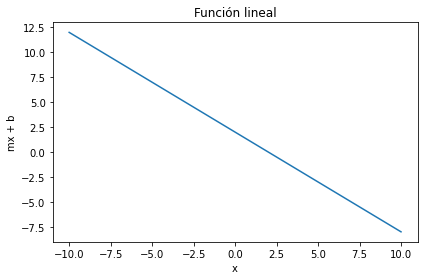

In [2]:
import numpy as np
import matplotlib.pyplot as plt

m = float(input("Pendiente: "))
b = float(input("Intersección con eje Y: "))
inf = float(input("Límite izquierdo: "))
sup = float(input("Límite derecho: "))
# Pedimos al usuario los parámetros necesarios para una función de la forma
# f(x) = mx + b, así como el intervalo a graficar.

x = np.linspace(inf, sup)
# Generamos un rango uniforme de valores para x entre los límites especificados.
y = m * x + b
# Valores y correspondientes.
lenght = range(len(x))

with open('lineales.csv', 'w') as f:
    f.write('X,Y\n')
    f.write('\n'.join('{},{}'.format(x[i], y[i]) for i in lenght))
# Guardamos los pares (x,y) en un archivo, un par por renglón. De esta forma
# obtenemos una columna para 'x' y otra para 'y'.

plt.plot(x, y)
# Graficamos x vs y.

plt.xlabel("x")
plt.ylabel("mx + b")
plt.title("Función lineal")
# Etiquetas.

plt.tight_layout()

plt.show()
# Mostramos la gráfica

**b) Calcular una parábola de valores en cierto intervalo.**

---

Este problema es muy parecido al anterior; de hecho la estructura del programa es casi idéntica, lo único que cambia es la función con la que estamos trabajando. En general, una parábola que NO ha sido rotada en el plano está descrita por una función cuadrática de la forma $f(x) = \frac{1}{4c}(x-h)^2 + k$, donde el vértice de la parábola tiene coordenadas $(h,k)$ y el foco está dado por $(h,k+c)$. Si $c>0$, la parábola se abre hacia arriba, y si $c<0$ se abre hacia abajo. ($c = 0$ no es una parábola.)

Entonces simplemente pedimos los parámetros al usuario y calculamos los puntos de la forma $(x,f(x))$:

Ingrese el vértice (h,k) como h k:   1 2
Distancia del foco al vértice:  -2
Límite izquierdo:  -10
Límite derecho:  10


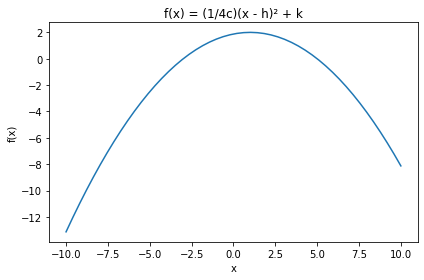

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def floats(str):
    return list(map(float, str.split()))

vert = floats(input("Ingrese el vértice (h,k) como h k:  "))
c = float(input("Distancia del foco al vértice: "))
if c == 0:
    print("La distancia debe ser distinta de cero.")
    exit()
# Parámetros de la ecuación cuadrática.
h = vert[0]
k = vert[1]

inf = float(input("Límite izquierdo: "))
sup = float(input("Límite derecho: "))
# Límites del intervalo a graficar.

x = np.linspace(inf, sup)
y = (x - h) ** 2 / (4 * c) + k
lenght = range(len(x))
# Si se introduce un intervalo con inf > sup, las x se graficarán en el
# intervalo [sup, inf]

with open('cuadrados.csv', 'w') as f:
    f.write('X,Y\n')
    f.write('\n'.join('{},{}'.format(x[i], y[i]) for i in lenght))

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('f(x) = (1/4c)(x - h)² + k')

plt.tight_layout()

plt.show()

## *Ejercicio 12*

---
---

**a) Calcular los datos de un movimiento rectilíneo uniforme en un intervalo $[t_0, t_f]$ definido por el usuario.**

---

Por simplicidad, se medirá el movimiento de tal manera que sea unidimensional. Como su nombre lo indica, el movimiento rectilíneo uniforme describe una trayectoria en línea recta, a velocidad constante ($\overline{v}(t) = \mathrm{cte}$). Denotando $x$ a la dimensión del movimiento, las ecuaciones que lo describen son:

\begin{align*}
\overline{a}(t) &= \frac{\mathrm{d}\overline{v}(t)}{\mathrm{d}t} = 0 \\
\overline{v}(t) &= \mathrm{cte}  \\
\overline{x}(t) &= \int \overline{v}(t) \mathrm{d}t = \overline{v}t + x_0.
\end{align*}

Donde $x_0$ es la posición inicial. Entonces lo único que el usuario debe especificar es la velocidad, la posición inicial, y el intervalo de tiempo en el que desea graficar. (obviamente los tiempos deben ser valores no negativos).

Velocidad(m/s):  17
Posición inicial:  0
Ingrese el intervalo [t0, tf] (s) como t0 tf:  0 10


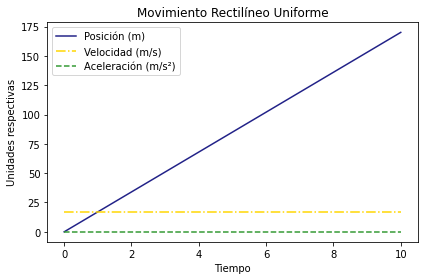

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def floats(str):
    return list(map(float, str.split()))

vel = float(input("Velocidad(m/s): "))
init = float(input("Posición inicial: "))
# Parámetros necesarios.

interval = floats(input("Ingrese el intervalo [t0, tf] (s) como t0 tf: "))
t0 = interval[0]
tf = interval[1]

if t0 < 0 or tf < 0:
    print("Ingrese tiempos válidos.")
    exit()
# Parámetros necesarios para las ecuaciones de movimiento. El tiempo debe ser
# no negativo (a menos que seas hackerman o.O)

t = np.linspace(t0, tf)
lenght = range(len(t))
# Intervalo a graficar.

pos = vel * t + init
v = np.array([vel for i in lenght])
a = np.array([0 for i in lenght])
# Desplazamiento, velocidad y aceleración en movimiento rectilíneo uniforme.

with open('uniform.csv', 'w') as f:
    f.write('Tiempo,Posición,Velocidad,Aceleración\n')
    f.write('\n'.join('{},{},{},0'.format(t[i], pos[i], vel) for i in lenght))
# Datos del movimient, separados por columnas.

plt.plot(t, pos, color='#222288', label='Posición (m)')
plt.plot(t, v, color='#ffd700', linestyle='-.', label='Velocidad (m/s)')
plt.plot(t, a, color='#329932', linestyle='--', label='Aceleración (m/s²)')
# Gráficas del movimiento respecto al tiempo.

plt.xlabel("Tiempo")
plt.ylabel("Unidades respectivas")
plt.title("Movimiento Rectilíneo Uniforme")

plt.legend()
plt.tight_layout()

plt.show()

**b) Calcular los datos de un movimiento uniformemente acelerado en un intervalo $[t_0, t_f]$ definido por el usuario.**

---

En cuanto a estrctura, este programa es casi idéntico al anterior, solo que cambiamos las ecuaciones de movimiento que estamos utilizando. De nuevo se asumirá que el movimiento uniformemente acelerado es unidimensional. Entonces, si denotamos como $x$ a la dirección del movimiento, las ecuaciones que lo describen están dadas por:

\begin{align*}
\overline{a}(t) &= \mathrm{cte} \\
\overline{v}(t) &= \int \overline{a}(t) \mathrm{d}t = \overline{a}t + v_0 \\
\overline{x}(t) &= \int \overline{v}(t) \mathrm{d}t =\frac{1}{2}\overline{a}t^2 + v_0t + x_0.
\end{align*}

Entonces, como parámetros iniciales, necesitamos la aceleración, la velocidad inicial y la posición inicial; además del intervalo de tiempo en el que se quiere graficar.

Aceleración (m/s²):  5
Velocidad Inicial (m/s):  25
Posición inicial:  0
Ingrese el intervalo [t0, tf] (S) como t0 tf:  0 10


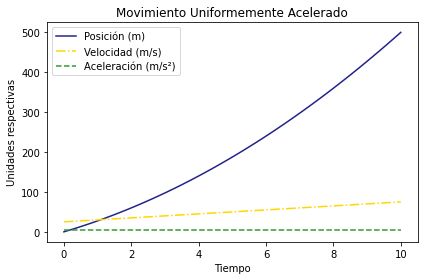

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def floats(str):
    return list(map(float, str.split()))

acc = float(input("Aceleración (m/s²): "))
v_init = float(input("Velocidad Inicial (m/s): "))
p_init = float(input("Posición inicial: "))

interval = floats(input("Ingrese el intervalo [t0, tf] (S) como t0 tf: "))
t0 = interval[0]
tf = interval[1]

if t0 < 0 or tf < 0:
    print("Ingrese tiempos válidos.")
    exit()

t = np.linspace(t0, tf)
lenght = range(len(t))

a = np.array([acc for i in lenght])
vel = acc * t + v_init
pos = acc * t ** 2 / 2 + v_init * t + p_init
# Aceleración, velocidad y desplazamiento en movimiento uniformemente acelerado.

with open('freefall.csv', 'w') as f:
    f.write('Tiempo,Posición,Velocidad,Aceleración\n')
    f.write('\n'.join('{},{},{},{}'.format(t[i], pos[i], vel[i], acc)
            for i in lenght))
# Datos del movimiento separados por columnas.

plt.plot(t, pos, color='#222288', label='Posición (m)')
plt.plot(t, vel, color='#ffd700', linestyle='-.', label='Velocidad (m/s)')
plt.plot(t, a, color='#329932', linestyle='--', label='Aceleración (m/s²)')
# Graficas del movimiento respecto al tiempo.

plt.xlabel("Tiempo")
plt.ylabel("Unidades respectivas")
plt.title("Movimiento Uniformemente Acelerado")

plt.legend()
plt.tight_layout()

plt.show()

**c) Calcular los datos de un tiro parabólico en un intervalo $[t_0, t_f] $ definido por el usuario.**

---

Por último, este problema es básicamente una combinación de los dos anteriores, pues si hacemos las simplificaciones habituales (la resistencia del aire no existe y el proyectil es esférico), el tiro parabólico puede modelarse como un movimiento en dos dimensiones, donde el movimiento en $x$ (horizontal) es rectilíneo uniforme y el movimiento en $y$ (vertical) es uniformemente acelerado (por el campo gravitatorio). 

En este caso también es necesario conocer la velocidad inicial $V_0$ del proyectil (que debe ser mayor a cero) y el ángulo de disparo $\theta$; entonces podríamos encontrar la velocidad inicial para cada coordenada:

$$
V_{x_0} = V_0\cos\theta \qquad V_{y_0} = V_0\sin\theta.
$$

Otra aclaración importante respecto a cómo se medirá el movimiento en el programa, es que el eje $Y$ del sistema de referencia siempre se hace corresponder con la posición del proyectil, o sea, se coloca de tal forma que la posición inicial del proyectil sea $(0, h)$, por lo que podemos tomar $x_0 = 0$. <br>
Entonces, si tomamos $g = 9.81 \left[\frac{m}{s^2}\right]$, las ecuaciones de movimiento son:

\begin{align*}
& \text{En }X                       &   & \text{En }Y \\
\overline{a}_x(t) &= 0              &  \overline{a}_y(t) &= -g \\
\overline{v}_x(t) &= v_{x_0}        &  \overline{v}_y(t) &= -gt + v_{y_0} \\
\overline{x}(t) &= v_{x_0}t         &  \overline{y}(t) &= -\frac{1}{2}gt^2 + v_{y_0}t + h_0.
\end{align*}

Ahora, para la colocación del eje $X$ pueden ocurrir dos escenarios. Puede que la altura **final** del proyectil sea *menor o igual* a la altura **inicial** (que es lo más común), pero también puede ocurrir lo contrario, que el proyectil termine en un lugar más alto del que comenzó. 

Lo más conveniente es hacer que el eje $X$ se corresponda con la *altura más baja*; o sea que si se da el primer caso tendríamos que la altura final, $h_f = 0$ y $h_0$ es introducida por el usuario. En caso contrario, el usuario debe especificar $h_f$ y tomaremos $h_0 = 0$.

Por último, conviene calcular información importante respecto al tiro parabólico, como la **altura máxima**, **Tiempo de vuelo** y **Alcance Horizontal**. <br>
La altura máxima se alcanza precisamente cuando $\overline{V}_y(t) = 0$, por lo que $t_{max} = \frac{V_{y_0}}{g}$ y 

$$
h_{max} = \overline{y}(t_{max}) = \frac{V_{y_0}^2}{2g} + h_0. 
$$

Nótese entonces que si la altura final supera a la inicial, no puede rebasa el valor $h_{max}$.

Para el tiempo de vuelo, es precisamente el tiempo que tarda el proyectil en llegar a la altura final, o sea, $\overline{y}(t_f) = h_f$, así que podemos despejar para $t_f$ en la ecuación para obtener que 

$$
t_f = \frac{v_{y_0} + \sqrt{v_{y_0}^2 - 2g\Delta h}}{g}.
$$

Sabemos que el radical está bien definido porque $h_f \leq h_{max}$, es decir, $h_f \leq \frac{v_{y_0}^2}{2g} + h_0$ y $2g\Delta h \leq v_{y_0}^2$.

Por último, el alcance horizontal es precisamente $\overline{x}(t_f)$. Entonces, ya con todos los cálculos hechos, procedemos a pedirle los parámetros iniciales al usuario:

Velocidad Inicial (m/s):  25
Ángulo de disparo (radianes):  0.5

Si la altura final supera a la inicial, especifíquela (m). De lo contrario, presione ENTER:  

Ingrese la altura inicial(m):  7

El proyectil cae al suelo tras 2.930536160293565 segundos. Indique un tiempo final menor o igual a éste.
Ingrese el intervalo [t0, tf] como t0 tf:  0 2.930536160293565



Altura máxima: 14.321892426921831 m.
Tiempo de vuelo: 2.930536160293565 s.
Alcance horizontal: 64.29468578157007 m.



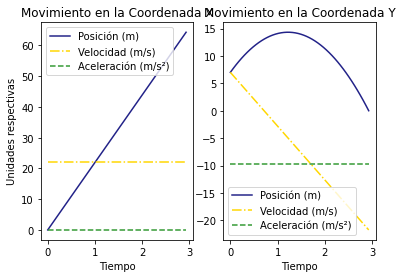

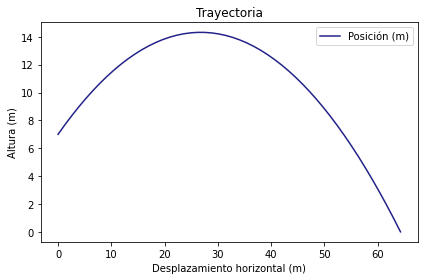

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

sin = np.sin
cos = np.cos

def floats(str):
    return list(map(float, str.split()))

v_init = float(input("Velocidad Inicial (m/s): "))
ang = float(input("Ángulo de disparo (radianes): "))

if v_init <= 0:
    print("Ingrese una velocidad válida para tiro parabólico.")
    exit()
# Parámetros iniciales.

vx0 = v_init * cos(ang)
# Velocidad inicial en X
vy0 = v_init * sin(ang)
# Velocidad inicial en Y

h_fin = input("""
Si la altura final supera a la inicial, especifíquela (m). \
De lo contrario, presione ENTER: """)

if h_fin != '':
    h_init = 0
    h_max = vy0 ** 2 / 19.62
    # Altura máxima del proyectil tomando la altura inicial como 0
    h_fin = float(h_fin)
    if h_fin > h_max:
        print(f"La altura final supera la altura máxima de {h_max} m.")
        exit()
else:
    h_init = float(input("\nIngrese la altura inicial(m): "))
    h_fin = 0
    h_max = vy0 ** 2 / 19.62 + h_init # Altura máxima.

# Básicamente, lo que se quiere hacer con este condicional es que el eje X de
# nuestro sistema de referencia coincida con el nivel de la altura más baja.
# La primera parte es el caso donde la altura final supera a la inicial, y la
# segunda parte es el caso contrario.

disc = vy0 ** 2 - 19.62 * (h_fin - h_init)
t_floor = (vy0 + sqrt(disc)) / 9.81
# Tiempo que tarda el proyectil en caer al piso.
reach = vx0 * t_floor
# Alcance horizontal del proyectil.

interval = floats(input(f"""
El proyectil cae al suelo tras {t_floor} segundos. \
Indique un tiempo final menor o igual a éste.
Ingrese el intervalo [t0, tf] como t0 tf: """))
# No tendría sentido graficar más allá de este punto.

t0 = interval[0]
tf = interval[1]

if t0 < 0 or tf < 0 or tf > t_floor:
    print("Ingrese tiempos válidos.")
    exit()
# Intervalo de tiempo a graficar

t = np.linspace(t0, tf)
lenght = range(len(t))

pos_x = vx0 * t
vel_x = np.array([vx0 for i in lenght])
acc_x = np.array([0 for i in lenght])
# Movimiento en la coordenada X. (Se asume que no hay aceleración horizontal).

pos_y = -9.81 * t ** 2 / 2 + vy0 * t + h_init
vel_y = -9.81 * t + h_init
acc_y = np.array([-9.81 for i in lenght])
# Movimiento en la coordenada Y. (Uniformemente acelerado por la gravedad).

with open('movimiento_x.csv', 'w') as f:
    f.write('Tiempo,Posición,Velocidad,Aceleración\n')
    f.write('\n'.join('{},{},{},{}'.format(t[i], pos_x[i], vel_x[i], acc_x[i])
            for i in lenght))
# Datos del movimiento en el eje X

with open('movimiento_y.csv', 'w') as f:
    f.write('Tiempo,Posición,Velocidad,Aceleración\n')
    f.write('\n'.join('{},{},{},{}'.format(t[i], pos_y[i], vel_y[i], acc_y[i])
            for i in lenght))
# Datos del movimiento en el eje Y

with open('trayectoria.csv', 'w') as f:
    f.write('Posición_X,Posición_Y\n')
    f.write('\n'.join('{},{}'.format(pos_x[i], pos_y[i]) for i in lenght))
# Datos de la posición en X vs posición en Y.

print(f"""
Altura máxima: {h_max} m.
Tiempo de vuelo: {t_floor} s.
Alcance horizontal: {reach} m.
""")
# Información relevante del tiro parabólico

fig1, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
# Figura para el movimiento de cada coordenada respecto al tiempo. Ambas
# graficas están en una sola figura.
fig2, ax3 = plt.subplots()
# Figura para la trayectoria del proyectil.

ax1.plot(t, pos_x, color='#222288', label='Posición (m)')
ax1.plot(t, vel_x, color='#ffd700', linestyle='-.', label='Velocidad (m/s)')
ax1.plot(t, acc_x, color='#329932', linestyle='--', label='Aceleración (m/s²)')
# Datos graficados del movimiento en X

ax1.set_xlabel("Tiempo")
ax1.set_ylabel("Unidades respectivas")
ax1.set_title("Movimiento en la Coordenada X")

ax1.legend()

ax2.plot(t, pos_y, color='#222288', label='Posición (m)')
ax2.plot(t, vel_y, color='#ffd700', linestyle='-.', label='Velocidad (m/s)')
ax2.plot(t, acc_y, color='#329932', linestyle='--', label='Aceleración (m/s²)')
# Datos graficados del movimiento en Y

ax2.set_xlabel("Tiempo")
ax2.set_title("Movimiento en la Coordenada Y")

ax2.legend()

ax3.plot(pos_x, pos_y, color='#222288', label='Posición (m)')
# Grafica de la trayectoria.

ax3.set_xlabel("Desplazamiento horizontal (m)")
ax3.set_ylabel("Altura (m)")
ax3.set_title("Trayectoria")

ax3.legend()

plt.tight_layout()

plt.show()